In [1]:
from pathlib import Path
import tardis

from tardis.io.configuration.config_reader import Configuration
from tardis.workflows.simple_tardis_workflow import SimpleTARDISWorkflow

Iterations:          0/? [00:00<?, ?it/s]

Packets:             0/? [00:00<?, ?it/s]

In [2]:
config = Configuration.from_yaml(Path("../../tardis/plasma/tests/data/plasma_base_test_config.yml"))

config.model.abundances = {"type": "uniform", "H": 0.75, "He": 0.25}

config.plasma.initial_t_inner = 12000
config.plasma.nlte = {"species": ["H I", "He I", "He II"], "classical_nebular": False, "coronal_approximation": False}
config.plasma.ionization = "nebular"
config.plasma.excitation = "dilute-lte"
config.atom_data = "kurucz_cd23_chianti_H_He_latest.h5"

config.montecarlo.iterations = 40
config.montecarlo.last_no_of_packets = 1e7

config.montecarlo.convergence_strategy = {"t_rad": {"type": "damped", "damping_constant": 0.5, "threshold": 0.01},
                                          "w": {"type": "damped", "damping_constant": 0.5, "threshold": 0.01},
                                          "t_inner": {"type": "damped", "damping_constant": 0.5, "threshold": 0.01},
                                          "t_inner_update_exponent": -0.5,
                                          "lock_t_inner_cycles": 1,
                                          "hold_iterations": 4,
                                          "stop_if_converged": True}

In [3]:
workflow = SimpleTARDISWorkflow(config)

In [4]:
workflow.run()

TqdmHBox(children=(HTML(value='Iterations:', layout=Layout(width='6%')), FloatProgress(value=0.0, layout=Layou…

TqdmHBox(children=(HTML(value='Packets:\u2007\u2007\u2007', layout=Layout(width='6%')), FloatProgress(value=0.…

In [5]:
import networkx as nx

A = nx.nx_agraph.to_agraph(workflow.plasma_solver.graph)
A.layout(prog='dot')
A.draw('equilibrium_plasma.png')

In [6]:
import matplotlib.pyplot as plt

In [7]:
spectrum = workflow.spectrum_solver.spectrum_real_packets
spectrum_virtual = workflow.spectrum_solver.spectrum_virtual_packets
#spectrum_integrated = workflow.spectrum_solver.spectrum_integrated

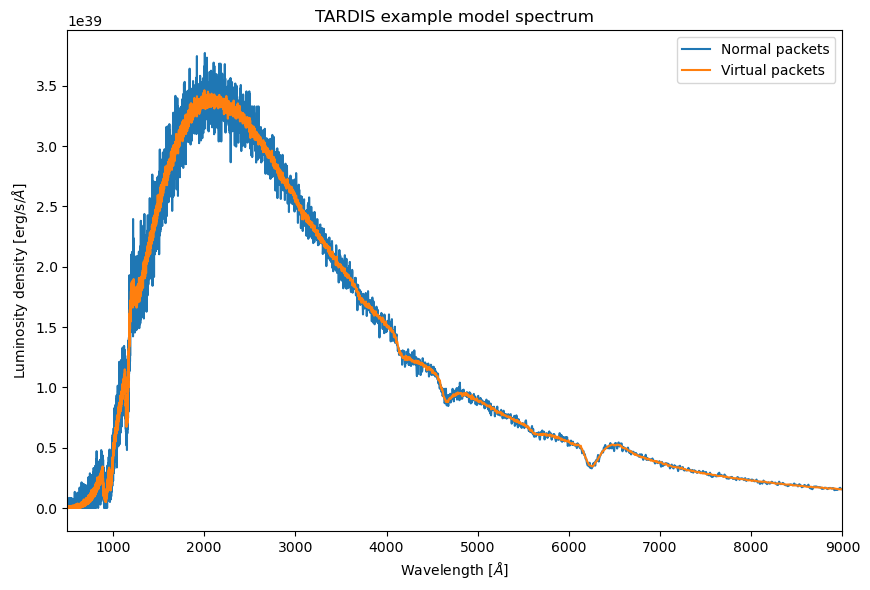

In [8]:
%matplotlib inline
plt.figure(figsize=(10, 6.5))

spectrum.plot(label="Normal packets")
spectrum_virtual.plot(label="Virtual packets")
#spectrum_integrated.plot(label='Formal integral')

plt.xlim(500, 9000)
plt.title("TARDIS example model spectrum")
plt.xlabel("Wavelength [$\AA$]")
plt.ylabel("Luminosity density [erg/s/$\AA$]")
plt.legend()
plt.show()